In [1]:
from math import cos
from math import sin
from math import pi
from random import shuffle
from sklearn.metrics.pairwise import euclidean_distances

# Set up TSP problem size 
N = 8

# Generate a TSP problem for N cities
dr = (2 * pi) / N

x0 = []
for i in range(0,N):
    radians = dr * i  
    x0.append([0.4*cos(radians) + .5, 0.4*sin(radians)+ .5])

#shuffle(x0)

citydistance = euclidean_distances(x0) # a matrix containing city to city distance

In [7]:
citydistance

array([[0.        , 0.30614675, 0.56568542, 0.73910363, 0.8       ,
        0.73910363, 0.56568542, 0.30614675],
       [0.30614675, 0.        , 0.30614675, 0.56568542, 0.73910363,
        0.8       , 0.73910363, 0.56568542],
       [0.56568542, 0.30614675, 0.        , 0.30614675, 0.56568542,
        0.73910363, 0.8       , 0.73910363],
       [0.73910363, 0.56568542, 0.30614675, 0.        , 0.30614675,
        0.56568542, 0.73910363, 0.8       ],
       [0.8       , 0.73910363, 0.56568542, 0.30614675, 0.        ,
        0.30614675, 0.56568542, 0.73910363],
       [0.73910363, 0.8       , 0.73910363, 0.56568542, 0.30614675,
        0.        , 0.30614675, 0.56568542],
       [0.56568542, 0.73910363, 0.8       , 0.73910363, 0.56568542,
        0.30614675, 0.        , 0.30614675],
       [0.30614675, 0.56568542, 0.73910363, 0.8       , 0.73910363,
        0.56568542, 0.30614675, 0.        ]])

In /home/hp/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/hp/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/hp/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/hp/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/hp/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_tes

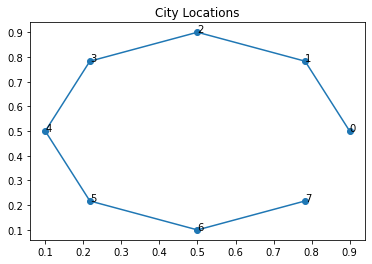

In [2]:
import matplotlib.pyplot as plt
# Display the shuffled datapoints
plt_x,plt_y = zip(*x0)
fig, ax = plt.subplots()
ax.scatter(plt_x, plt_y)
ax.plot(plt_x, plt_y)

for i in range(N):
  ax.annotate(str(i), (plt_x[i], plt_y[i]))
plt.title("City Locations")
plt.show()


In [3]:
import numpy as np
########################################### 
# Genetic Search
ngen = 1000
ngpool = N

gpool = np.zeros((ngpool,N)).astype('int')
 
for i in range(ngpool):
  # We ensure that the first element remains 0
#  if i == 0:
#    gpool[i] = range(N)
#  else:
  gpool[i,1:] = (np.random.permutation(N-1) + 1)

  costmin = N
  tourmin = np.zeros(N)
  cost = np.zeros(ngpool)
for i in range(ngen):
  # step 1. evaluate the fitness of current chromosomes
  # for tsp problem it is the trip length. the smaller the better
  for j in range(ngpool):
    id_shift = gpool[j,-1:].tolist() + gpool[j,:-1].tolist()
    cost[j] = np.sum(np.diag(citydistance[gpool[j,:].tolist(),id_shift]))

  # Record the current best solution
  costmin = np.amin(cost)
  idx = np.argmin(cost)
  tourmin = gpool[idx,:]

  #print(cost)
  #print(costmin)
  # step 2. cross breeding and mutation
  # since each chromosome is an integer vector, cross breeding
  # can not be done simply by combining binary vectors. 
  # Instead, we let the off-spring to keep the common genes of
  # the parents, and randomly shuffle genes when parents disagree
  # for simplicity, we only cross-breed the two best solutions. 

  ridx = sorted(range(len(cost)), key=lambda k: cost[k])


  # parents
  mother = gpool[ridx[0],:]
  father = gpool[ridx[1],:]
  # find index of genes that are the same in father and mother
  sameidx = father == mother
  diffidx = np.nonzero(1 - sameidx)[0]


  if len(diffidx <= 4): # father and mother too close!
    # do mutation
    boy = [0] + (np.random.permutation(N-1) + 1).tolist()
    girl = [0] + (np.random.permutation(N-1) + 1).tolist()
  else:
    boy = father * sameidx
    boy[diffidx] = father[diffidx[np.random.permutation(len(diffidx))]]
    girl = mother * sameidx
    girl[diffidx] = mother[diffidx[np.random.permutation(len(diffidx))]]
  
  #Replace the worst two
  gpool[ridx[-2]] = boy
  gpool[ridx[-1]] = girl


In [4]:
print("cost function evaluation: " + str(ngen*2 + ngpool) + " times!")
print("Minimum trip length = " + str(costmin))
print("optimum tour = " + str(tourmin))

cost function evaluation: 2008 times!
Minimum trip length = 2.4491739671365753
optimum tour = [0 7 6 5 4 3 2 1]


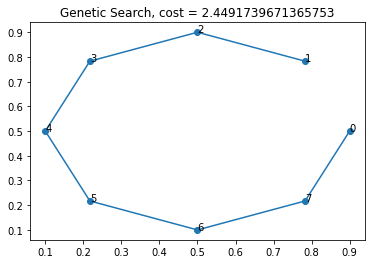

In [5]:
import matplotlib.pyplot as plt
# Display the shuffled datapoints
plt_x,plt_y = zip(*x0)
fig, ax = plt.subplots()
ax.scatter(plt_x, plt_y)
ax.plot(np.array(plt_x)[tourmin],np.array(plt_y)[tourmin])

for i in range(N):
  ax.annotate(str(i), (plt_x[i], plt_y[i]))
plt.title("Genetic Search, cost = " + str(costmin))
plt.show()